# Welcome to Colab!

For this exercise we will be using transfer learning to train a model on a dataset that we create from images grabbed from the internet



*   To execute a tab, click on the left side of the tab (where a play button
*   Double click a tab to show the code
*   Feel free to explore and change things!


In [ ]:
#@title Install python libraries

!pip install tflite-model-maker
!pip install bing_image_downloader




In [ ]:
#@title import python libraries
from matplotlib import pyplot as plt
import glob
import cv2 as cv
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
from  tflite_model_maker import image_classifier
from bing_image_downloader import downloader


# Create your dataset

In [ ]:
search_prompt1 = 'hand making a fist' #@param {type:"string"}
number_images = '75' #@param {type:"string"}
number_images = int(number_images)
downloader.download(search_prompt1, limit=number_images,  output_dir='dataset', force_replace=False, timeout=60)

gif_test = glob.glob('/content/dataset/'+search_prompt1+'/*')
for ele in gif_test:
  if ele.split('.')[-1] == 'gif':
    os.remove(ele)

[%] Downloading Images to /content/dataset/hand making a fist


[!!]Indexing page: 1

[%] Indexed 47 Images on Page 1.


[%] Downloading Image #1 from https://img3.gelbooru.com/images/1b/0a/1b0aa87b9f17c8cf10c80a1a0aa824af.png
[%] File Downloaded !

[%] Downloading Image #2 from https://s.smutty.com/media_smutty/s/h/a/m/b/shame85-0bwe7-e07fcc.gif
[%] File Downloaded !

[%] Downloading Image #3 from https://www.bing.com/th/id/OGC.6d67370df00d5a779b12f5d5d935e61b?pid=1.7&amp;rurl=https%3a%2f%2fs.smutty.com%2fmedia_smutty%2fs%2fh%2fa%2fm%2fb%2fshame85-0bwe7-e07fcc.gif&amp;ehk=wvBYzFL668AGK43VcwOI6mXkl2u5OwoPNg%2bsZD4tHE0%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.6d67370df00d5a779b12f5d5d935e61b?pid=1.7&amp;rurl=https%3a%2f%2fs.smutty.com%2fmedia_smutty%2fs%2fh%2fa%2fm%2fb%2fshame85-0bwe7-e07fcc.gif&amp;ehk=wvBYzFL668AGK43VcwOI6mXkl2u5OwoPNg%2bsZD4tHE0%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #3 from http://24.media.tumblr.com/tumblr_mcxb4zX4Rc1qg205no1_128

In [ ]:
search_prompt1 = 'flat hand' #@param {type:"string"}
number_images = '75' #@param {type:"string"}
number_images = int(number_images)
downloader.download(search_prompt1, limit=number_images,  output_dir='dataset', force_replace=False, timeout=60)

gif_test = glob.glob('/content/dataset/'+search_prompt1+'/*')
for ele in gif_test:
  if ele.split('.')[-1] == 'gif':
    os.remove(ele)

[%] Downloading Images to /content/dataset/flat hand


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://images.freeimages.com/images/large-previews/a87/hand-on-flat-surface-1632654.png
[%] File Downloaded !

[%] Downloading Image #2 from https://www.seekpng.com/png/detail/2-20616_flat-hand-png-hand-transparent-png.png
[%] File Downloaded !

[%] Downloading Image #3 from https://clipground.com/images/hand-png-clipart-2.png
[%] File Downloaded !

[%] Downloading Image #4 from https://images.freeimages.com/images/large-previews/be0/hand-1251291.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://c8.alamy.com/comp/CXM0EA/flat-palm-male-hand-gesture-on-plain-white-cut-out-CXM0EA.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://images.freeimages.com/images/previews/d4b/hand-1311078.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://ramseyvoice.com/wp-content/uploads/2015/06/Flat-hand.jpg
[%] File Downloa

In [ ]:
search_prompt1 = 'peace sign hand signal' #@param {type:"string"}
number_images = '75' #@param {type:"string"}
number_images = int(number_images)
downloader.download(search_prompt1, limit=number_images,  output_dir='dataset', force_replace=False, timeout=60)

gif_test = glob.glob('/content/dataset/'+search_prompt1+'/*')
for ele in gif_test:
  if ele.split('.')[-1] == 'gif':
    os.remove(ele)



[%] Downloading Images to /content/dataset/peace sign hand signal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://www.clipartbest.com/cliparts/aTq/obe/aTqobeBTM.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from http://cliparts.co/cliparts/6ir/6KM/6ir6KMKBT.png
[%] File Downloaded !

[%] Downloading Image #3 from http://images.clipartpanda.com/peace-sign-hand-peace-sign-hand-signal-p011.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://c1.peakpx.com/wallpaper/168/660/987/gesture-sign-language-finger-v-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.tgvinyl.net/wp-content/uploads/2019/02/Peace-Hand-v3-black.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://static.vecteezy.com/system/resources/previews/000/345/382/original/hand-peace-sign-vector-illustration.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://static.vecteezy.com/system/resources/previews/000/554

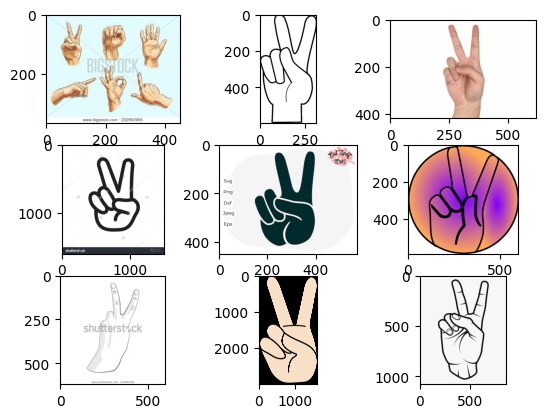

In [ ]:
#@title To display results
search_prompt1 = 'peace sign hand signal' #@param {type:"string"}

ax = plt.subplot(3,3,1)
allIms = glob.glob('/content/dataset/'+search_prompt1+'/*')
randIms = np.random.permutation(len(allIms))[:9]
cnt = 1
for ele in randIms:
  ax = plt.subplot(3,3,cnt)
  cnt+=1
  tempIm = cv.imread(allIms[ele])[:,:,::-1]
  ax.imshow(tempIm)

In [ ]:
!rm /content/dataset/peace\ sign\ hand\ signal -r

# Preparing your dataset

We'll use tensorflow tools to automatically prepare your dataset based off the directory path, '/content/dataset/, and all the subdirectories within.

By default we'll split the dataset into 85% training data andd 15% validation data (feel free to update)



*   If any GIFs made it into your dataset, be sure to delete them



In [ ]:
data = image_classifier.DataLoader.from_folder('/content/dataset/')
train_data, validation_data = data.split(0.85)

# TRAIN YOUR MODEL

in the next few lines of code we will use transfer learning on a pretrained mobilenet-V2 model using the training set and validation set that you created!

In [ ]:
model = image_classifier.create(train_data,
                                model_spec=model_spec.get('mobilenet_v2'),
                                validation_data=validation_data,
                                epochs=5,
                                train_whole_model=False)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_5 (Hub  (None, 1280)             2257984   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
3/6 [==============>...............] - ETA: 11s - loss: 1.2704 - accuracy: 0.4271

InvalidArgumentError: ignored

In [ ]:
glob.glob('/content/dataset/hand making a fist/*')

In [ ]:
from tflite_model_maker.config import QuantizationConfig

In [ ]:
TFLITE_FILENAME = 'rockPaperScissors.tflite'
LABELS_FILENAME = 'rockPaperScissors.txt'

model.export(export_dir='/content/', tflite_filename=TFLITE_FILENAME, label_filename=LABELS_FILENAME,
             export_format=[ExportFormat.TFLITE, ExportFormat.LABEL])

/usr/local/lib/python3.9/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [ ]:
!pip install tflite_runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.0 MB/s eta 0:00:00


In [ ]:
import tflite_runtime.interpreter as tflite

In [ ]:
from tflite_runtime.interpreter import Interpreter

In [ ]:
TFLITE_FILENAME = 'rockPaperScissors2.tflite'
LABELS_FILENAME = 'rockPaperScissors2.txt'


baseF = '/content/'
interpreter = Interpreter(baseF+TFLITE_FILENAME)
interpreter.allocate_tensors()


In [ ]:
input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
interpreter.get_input_details()[0]

{'name': 'input_2',
 'index': 0,
 'shape': array([  1, 224, 224,   3], dtype=int32),
 'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
 'dtype': numpy.uint8,
 'quantization': (0.003921568859368563, 0),
 'quantization_parameters': {'scales': array([0.00392157], dtype=float32),
  'zero_points': array([0], dtype=int32),
  'quantized_dimension': 0},
 'sparsity_parameters': {}}

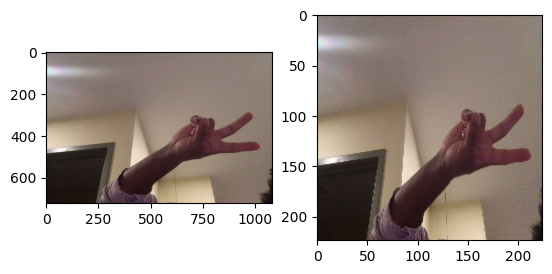

In [ ]:
test = cv.imread('/content/scissors.jpg')[:,:,::-1]
ax = plt.subplot(1,2,1)
ax.imshow(test)
test = cv.resize(test,(224,224))
ax = plt.subplot(1,2,2)
ax.imshow(test)
test = np.expand_dims(test,axis=0)
test = (test).astype(np.uint8)
interpreter.set_tensor(input_index,test)

In [ ]:
interpreter.invoke()
predictions = interpreter.get_tensor(output_index)

In [ ]:
predictions

array([[ 28,  63, 165]], dtype=uint8)

In [ ]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.nanmax(x))
    return e_x / np.nansum(e_x)

In [ ]:
x = [float(ele) for ele in predictions[0]]
softmax(np.array(x))